In [1]:
import random
import pandas as pd
class Stitch(object):
    def __init__(self, size=None, loc=None, prevmove =None):
        # size is the number of points on one side of the square grid
        # path is the route taken through the grid
        if loc is None:
            self.loc = [[50,50]]
        else:
            self.loc = loc
        if prevmove is None:
            self.prevmove = [0,0]
        else:
            self.prevmove = prevmove
        if size is None:
            self.size = 100
        else:
            self.size = size

    def update(self, inc):
        newx = self.loc[-1][0]+inc[0]
        newy = self.loc[-1][1]+inc[1]
        self.loc.append([newx, newy])
        return self.loc[-1]
    
    def possibilities(self):
        # takes in current stitch object
        # holding current location and history 
        # as well as boundary locations
        # returns list of all possible visitable locations in one step
        # assuming update is of length one. 
        # if no updates are possible returns NA,NA. stop. 
        return 
    
    coords = [[0,1], [1,1], [1,0], [1,-1], [0,-1], [-1,-1], [-1,0], [-1,1]]
    
    def random_walk(self, steps,  moves=coords):
        # step size 1
        # none-backtracking random walk
        
        for ii in range(0,steps):
            to_remove = [self.prevmove[0]*-1, self.prevmove[1]*-1]
            options = [x for x in moves if x != to_remove]
            to_move = random.choice(options)
            self.prevmove = to_move
            self.update(to_move)
        
        return self

In [2]:
import random
random.seed('milton')
rw_50 = Stitch()

In [3]:
rw_50.random_walk(steps=400)

In [4]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
rw_df = pd.DataFrame(rw_50.loc)

In [6]:
rw_df.columns=['x', 'y']
rw_df.reset_index(level=0, inplace=True)

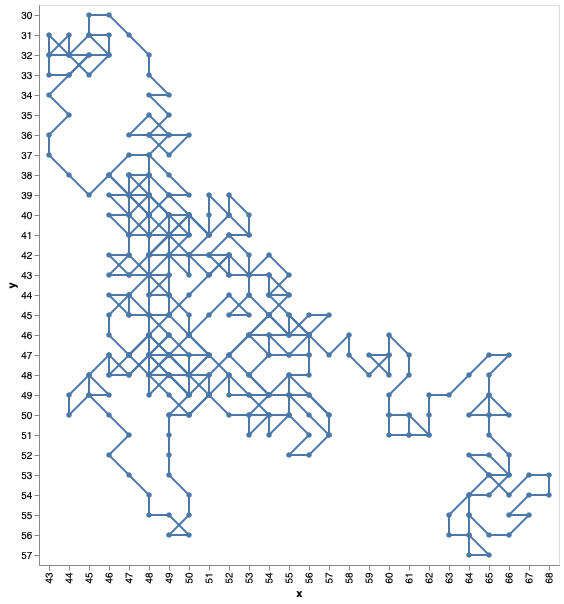

In [7]:
alt.Chart(pd.DataFrame(rw_df)).mark_line(point=True).encode(
    alt.X('x:O', scale=alt.Scale(zero=False)), alt.Y('y:O',scale=alt.Scale(zero=False)), order ='index' )

1. it's going back to points we already visited. (it can loop but it can't just do an immediate backtrack) 
2. it's completely unconstrained 

Next steps - 
1. (?only) make jumps 2 away
2. self avoiding more strongly (remember history and avoid)


In [8]:
two_step =  [[2,0],[2,1], [2,2],[1,2], [0,2],[-1,2],[-2,2],[-2,1],[-2,0], [-2,-1], [-2,-2], [-1,-2], [0,-2], [1,-2], [2,-2], [2, -1] ]

In [9]:
import random
random.seed('milton')
rw_50_2 = Stitch()
print(rw_50_2.loc)
rw_50_2.random_walk(steps=400, moves=two_step)

[[50, 50]]


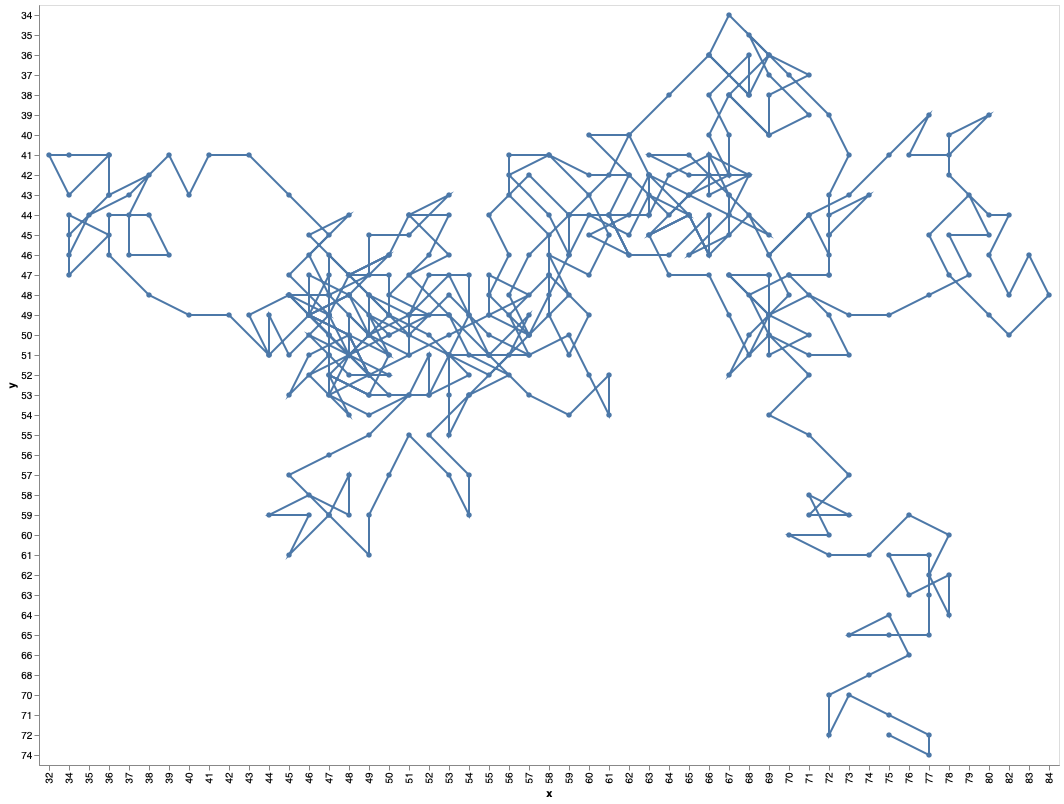

In [11]:
rw_df_2 = pd.DataFrame(rw_50_2.loc)
rw_df_2.columns=['x', 'y']
rw_df_2.reset_index(level=0, inplace=True)
alt.Chart(pd.DataFrame(rw_df_2)).mark_line(point=True).encode(
    alt.X('x:O', scale=alt.Scale(zero=False)), alt.Y('y:O',scale=alt.Scale(zero=False)), order ='index' )